In [21]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [22]:
movies = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_new.csv')

In [23]:
ratings = pd.read_csv("/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/ratings.csv")

In [24]:
ratings_movies = ratings.merge(movies, how='left', left_on='movieId', right_on='movieId')


In [25]:
ratings_movies.shape

(24404096, 28)

#### Remove missing data:

In [26]:
ratings_movies.dropna(inplace=True)

In [27]:
ratings_movies.shape

(22685691, 28)

In [28]:
ratings_movies.head()

,userId,movieId,rating,timestamp,Unnamed: 0,ratings_count,ratings_mean,title,genres,COMEDY,...,CHILDRENS,CRIME,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR,Year,title_list
0,1,122,2.0,945544824,120.0,4060.0,2.862931,Boomerang (1992),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992.0,['Boomerang']
1,1,172,1.0,945544871,170.0,14078.0,2.742542,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995.0,"['Johnny', 'Mnemonic']"
2,1,1221,5.0,945544788,1195.0,34508.0,4.263098,"Godfather: Part II, The (1974)",Crime|Drama,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0,"['Godfather:', 'Part', 'II,', 'The']"
3,1,1441,4.0,945544871,1406.0,6723.0,3.544102,Benny & Joon (1993),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,"['Benny', '&', 'Joon']"
5,1,1961,3.0,945544871,1878.0,29790.0,3.911195,Rain Man (1988),Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,"['Rain', 'Man']"


### Most times rated movies:

In [9]:
movie_ratings_count = pd.DataFrame(ratings_movies.groupby(['title'])['movieId'].count().reset_index())

In [10]:
movie_ratings_count.head()

,title,movieId
0,"""Great Performances"" Cats (1998)",211
1,#1 Cheerleader Camp (2010),6
2,#Horror (2015),9
3,#chicagoGirl: The Social Network Takes on a Di...,3
4,$5 a Day (2008),53


In [11]:
most_rated = movie_ratings_count.sort(columns='movieId', axis=0, ascending=False).head(20).reset_index()

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [12]:
most_rated

,index,title,movieId
0,8659,Forrest Gump (1994),86629
1,20619,"Shawshank Redemption, The (1994)",84455
2,18662,Pulp Fiction (1994),83523
3,20833,"Silence of the Lambs, The (1991)",80274
4,21714,Star Wars: Episode IV - A New Hope (1977),72215
5,12523,Jurassic Park (1993),72147
6,15081,"Matrix, The (1999)",71450
7,3679,Braveheart (1995),63920
8,20161,Schindler's List (1993),63889
9,25170,Toy Story (1995),63469


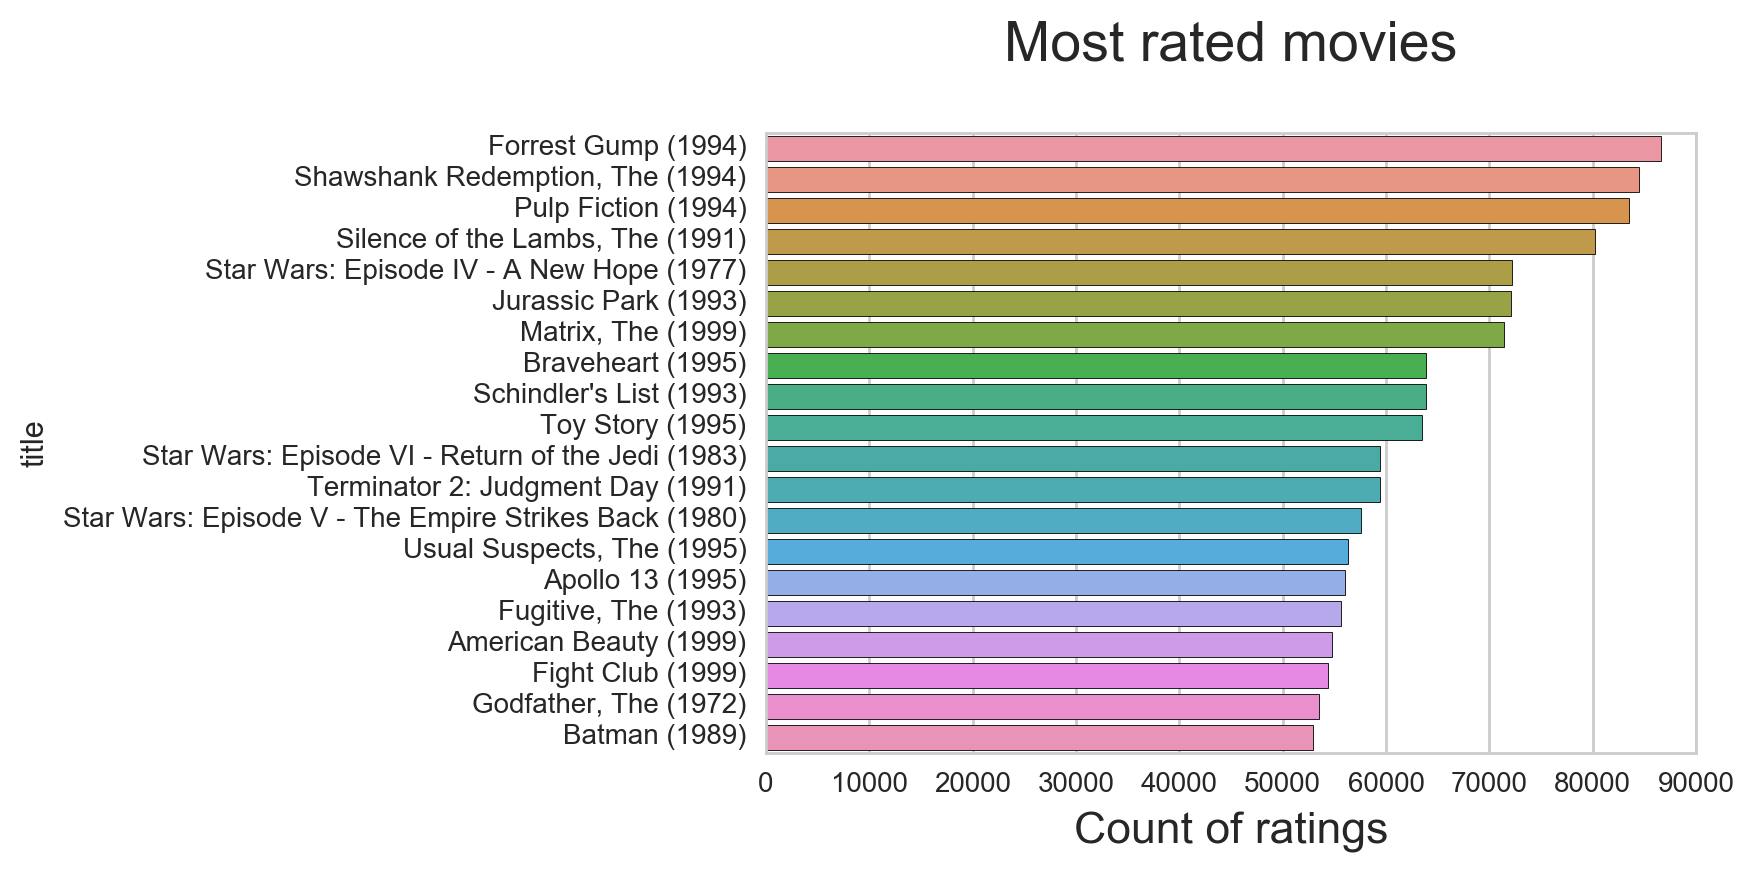

In [14]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()  #get current axis

ax = sns.barplot(x=most_rated["movieId"], y=most_rated["title"], orient='h')

ax.set_xlabel('Count of ratings', fontsize=16)
ax.set_title('Most rated movies\n', fontsize=20)

plt.show()


In [15]:
import patsy
formula  =  'HORROR ~ rating'
y, X     =  patsy.dmatrices(formula, data=ratings_movies, return_type="dataframe")

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = np.ravel(y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
#K-neighbors classifier with GridsearchCv
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

results = knn_gs.fit(Xn, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


In [ ]:
from sklearn.cross_validation import cross_val_score


scores = cross_val_score(knn_gs, Xn, y, cv=5)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


### Average rating per user:

In [9]:
avg_user = pd.DataFrame(ratings_movies.groupby(['userId'])['rating'].mean()).reset_index()

In [10]:
avg_user.head()

,userId,rating
0,1,2.666667
1,2,2.600000
2,3,3.344262
3,4,3.000000
4,5,3.925926


#### Merge this user average rating table with ratings_movies:

In [29]:
ratings_movies_user = ratings_movies.merge(avg_user, how='left', left_on='userId', right_on='userId')

In [30]:
ratings_movies_user.head()

,userId,movieId,rating_x,timestamp,Unnamed: 0,ratings_count,ratings_mean,title,genres,COMEDY,...,CRIME,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR,Year,title_list,rating_y
0,1,122,2.0,945544824,120.0,4060.0,2.862931,Boomerang (1992),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992.0,['Boomerang'],2.666667
1,1,172,1.0,945544871,170.0,14078.0,2.742542,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995.0,"['Johnny', 'Mnemonic']",2.666667
2,1,1221,5.0,945544788,1195.0,34508.0,4.263098,"Godfather: Part II, The (1974)",Crime|Drama,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1974.0,"['Godfather:', 'Part', 'II,', 'The']",2.666667
3,1,1441,4.0,945544871,1406.0,6723.0,3.544102,Benny & Joon (1993),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,"['Benny', '&', 'Joon']",2.666667
4,1,1961,3.0,945544871,1878.0,29790.0,3.911195,Rain Man (1988),Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,"['Rain', 'Man']",2.666667


In [31]:
ratings_movies_user['user_avg_rating'] = ratings_movies_user['rating_y']

In [32]:
del ratings_movies_user['rating_y']

#### New column movie rating - average user's rating (- values mean that the movie was below average rating):

In [33]:
ratings_movies_user['rating_mean_stand'] = ratings_movies_user['rating_x'] - ratings_movies_user['user_avg_rating']

In [34]:
ratings_movies_user.head()

,userId,movieId,rating_x,timestamp,Unnamed: 0,ratings_count,ratings_mean,title,genres,COMEDY,...,FANTASY,FILM-NOIR,MUSICAL,SCI-FI,MYSTERY,WAR,Year,title_list,user_avg_rating,rating_mean_stand
0,1,122,2.0,945544824,120.0,4060.0,2.862931,Boomerang (1992),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1992.0,['Boomerang'],2.666667,-0.666667
1,1,172,1.0,945544871,170.0,14078.0,2.742542,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1995.0,"['Johnny', 'Mnemonic']",2.666667,-1.666667
2,1,1221,5.0,945544788,1195.0,34508.0,4.263098,"Godfather: Part II, The (1974)",Crime|Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1974.0,"['Godfather:', 'Part', 'II,', 'The']",2.666667,2.333333
3,1,1441,4.0,945544871,1406.0,6723.0,3.544102,Benny & Joon (1993),Comedy|Romance,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,"['Benny', '&', 'Joon']",2.666667,1.333333
4,1,1961,3.0,945544871,1878.0,29790.0,3.911195,Rain Man (1988),Drama,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1988.0,"['Rain', 'Man']",2.666667,0.333333
